In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

NameError: name 'keras' is not defined

In [11]:
CLASS_NAMES = ['1','2','3','4','5','6','7','8','9','10']

IndexError: index 84 is out of bounds for axis 1 with size 10

In [13]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.uint8'>
<class 'tens

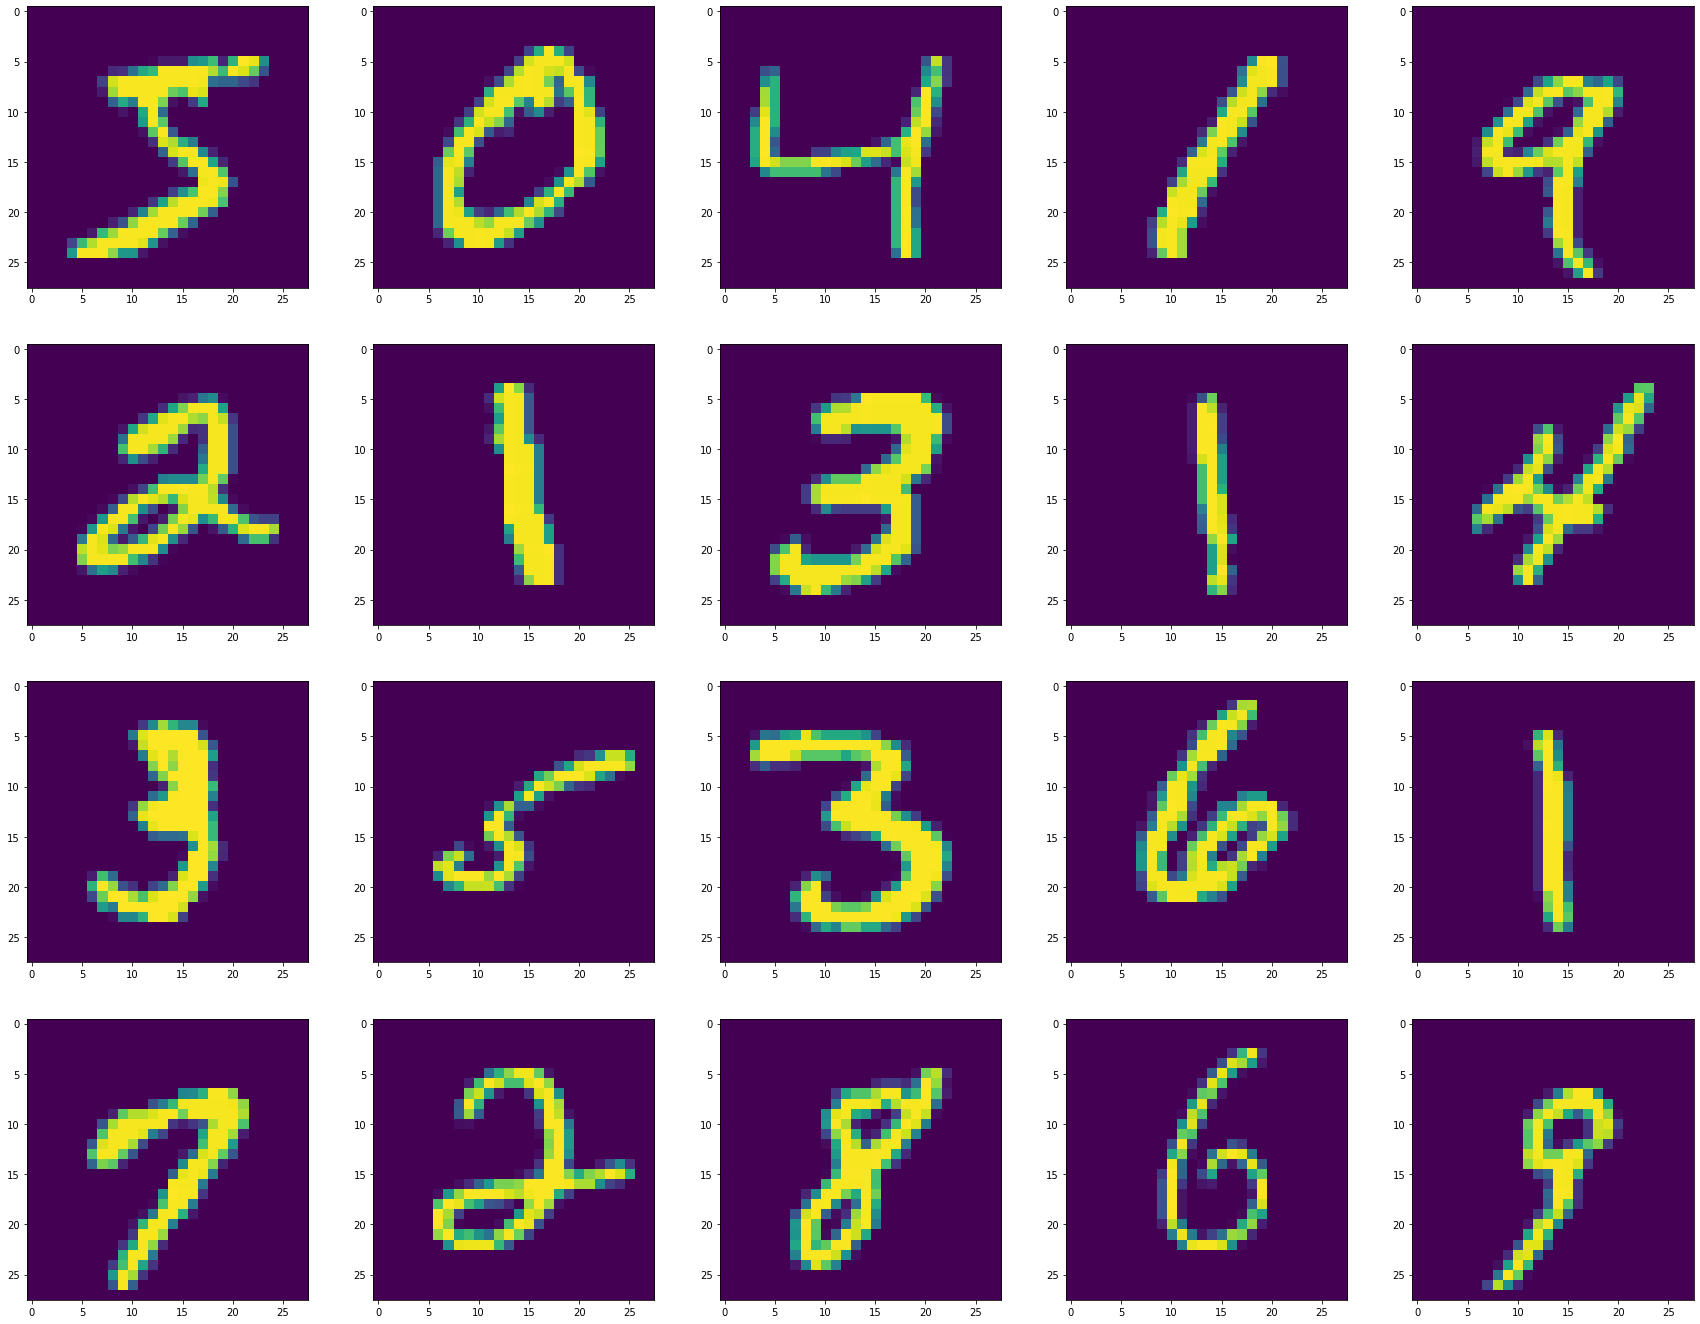

In [29]:
plt.figure(figsize=(30,30))
# (train_ds.take(20))
for i,(image,label) in enumerate(train_ds.take(20)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    print(type(label))
    print(type(label.numpy()))
#     plt.title(CLASS_NAMES[label.numpy()])
#     plt.axis("off")
                        
                          
                    

In [30]:
# ship mi truck mı bu sayılar nerden bilicem
def process_image(image,label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image,(64,64))
    
    return image,label

In [34]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print(train_ds_size)
print(test_ds_size)

60000
10000


(60000, 28, 28)


AttributeError: 'TensorSliceDataset' object has no attribute 'shape'

In [32]:
train_ds = (train_ds
           .map(process_image)
           .shuffle(buffer_size = train_ds_size)
           .batch(batch_size = 32, drop_remainder = True))

test_ds = (test_ds
           .map(process_image)
           .shuffle(buffer_size = test_ds_size)
           .batch(batch_size = 32, drop_remainder = True))

ValueError: in user code:

    /tmp/ipykernel_400/2843264794.py:3 process_image  *
        image = tf.image.per_image_standardization(image)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py:1928 per_image_standardization
        image = _AssertAtLeast3DImage(image)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py:199 _AssertAtLeast3DImage
        _CheckAtLeast3DImage(image, require_static=False), image)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py:224 _CheckAtLeast3DImage
        image.shape)

    ValueError: 'image' (shape (28, 28)) must be at least three-dimensional.


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256,kernel_size = (5,5),strides =(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")
]
)

In [11]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer=tf.optimizers.SGD(lr=0.0001),
             metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)         5

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = test_ds,
    validation_freq = 1
)

Epoch 1/50


2023-01-27 07:11:56.529877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-27 07:12:03.629020: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1562/1562 [==============================] - 29s 9ms/step - loss: 2.6371 - accuracy: 0.1490 - val_loss: 1.9594 - val_accuracy: 0.3091
Epoch 2/50
1562/1562 [==============================] - 19s 9ms/step - loss: 2.3080 - accuracy: 0.2119 - val_loss: 1.8257 - val_accuracy: 0.3577
Epoch 3/50
1562/1562 [==============================] - 19s 9ms/step - loss: 2.1486 - accuracy: 0.2548 - val_loss: 1.7383 - val_accuracy: 0.3890
Epoch 4/50
1562/1562 [==============================] - 18s 9ms/step - loss: 2.0324 - accuracy: 0.2805 - val_loss: 1.6688 - val_accuracy: 0.4152
Epoch 5/50
1562/1562 [==============================] - 19s 9ms/step - loss: 1.9462 - accuracy: 0.3075 - val_loss: 1.6102 - val_accuracy: 0.4327
Epoch 6/50
1562/1562 [==============================] - 19s 9ms/step - loss: 1.8730 - accuracy: 0.3312 - val_loss: 1.5715 - val_accuracy: 0.4442
Epoch 7/50
1562/1562 [==============================] - 20s 9ms/step - loss: 1.8192 - accuracy: 0.3502 - val_loss: 1.5285 - val_accuracy: 0.4